In [1]:
!pip install gitly
import pandas as pd
import numpy as np
import re
from datetime import datetime

import plotly
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
from gitly.colab.plot import GitlyPlotter
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot, plot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gitly = GitlyPlotter('github')

In [3]:
df= pd.read_csv("/content/drive/MyDrive/asalytics/github.csv")
df.head()

,repo_name,repo_desc,date_created,last_push_date,language,no_of_forks,no_of_stars,no_of_watchers,no_of_contributors,no_of_commits,issues,pull_requests,asa_id
0,ChoiceCoin/Algorand-Protocol,Repo for Algorand protocol software.,2022-01-25,2022-02-27,JavaScript,20,5,5,19,88,2,0,ChoiceCoin
1,ChoiceCoin/asa-list,Tinyman - Algorand Standard Assets List,2022-02-16,2022-03-30,JavaScript,0,0,0,70,401,0,0,ChoiceCoin
2,ChoiceCoin/ASAlytics,Repo for ASAlytics.,2022-02-16,2022-04-11,Python,3,8,8,2,3,0,0,ChoiceCoin
3,ChoiceCoin/Choice-Charities,Repository for Choice Charities initiative.,2021-10-26,2021-10-26,Python,1,8,8,2,6,0,0,ChoiceCoin
4,ChoiceCoin/Choice-V1,Repository detailing Choice Coin's Creation an...,2021-07-23,2022-04-11,Python,243,266,266,3,41,7,6,ChoiceCoin


# Github Analysis

In [4]:
df.loc[:,['date_created','last_push_date']] = df.loc[:,['date_created','last_push_date']].apply(pd.to_datetime, errors='coerce')

In [5]:
def extract_date(df,date_columns:list):
  for x in date_columns:
      df[x +'_day'] = df[x].dt.day
      df[x +'_month'] = df[x].dt.month
      df[x + '_year'] = df[x].dt.year
      df[x +'_weekday'] = df[x].dt.day_name()
  return df

In [6]:
extract_date(df, ["date_created", "last_push_date"])

,repo_name,repo_desc,date_created,last_push_date,language,no_of_forks,no_of_stars,no_of_watchers,no_of_contributors,no_of_commits,...,pull_requests,asa_id,date_created_day,date_created_month,date_created_year,date_created_weekday,last_push_date_day,last_push_date_month,last_push_date_year,last_push_date_weekday
0,ChoiceCoin/Algorand-Protocol,Repo for Algorand protocol software.,2022-01-25,2022-02-27,JavaScript,20,5,5,19,88,...,0,ChoiceCoin,25,1,2022,Tuesday,27,2,2022,Sunday
1,ChoiceCoin/asa-list,Tinyman - Algorand Standard Assets List,2022-02-16,2022-03-30,JavaScript,0,0,0,70,401,...,0,ChoiceCoin,16,2,2022,Wednesday,30,3,2022,Wednesday
2,ChoiceCoin/ASAlytics,Repo for ASAlytics.,2022-02-16,2022-04-11,Python,3,8,8,2,3,...,0,ChoiceCoin,16,2,2022,Wednesday,11,4,2022,Monday
3,ChoiceCoin/Choice-Charities,Repository for Choice Charities initiative.,2021-10-26,2021-10-26,Python,1,8,8,2,6,...,0,ChoiceCoin,26,10,2021,Tuesday,26,10,2021,Tuesday
4,ChoiceCoin/Choice-V1,Repository detailing Choice Coin's Creation an...,2021-07-23,2022-04-11,Python,243,266,266,3,41,...,6,ChoiceCoin,23,7,2021,Friday,11,4,2022,Monday
5,ChoiceCoin/ChoiceCoin.github.io,Choice Coin Public Website,2021-08-09,2022-04-11,JavaScript,2993,878,878,8,285,...,6,ChoiceCoin,9,8,2021,Monday,11,4,2022,Monday
6,ChoiceCoin/CHOICE_TinyMan_Wrapper,A wrapper for aquiring Choice Coin directly th...,2021-11-05,2022-03-24,Python,9,18,18,5,39,...,0,ChoiceCoin,5,11,2021,Friday,24,3,2022,Thursday
7,ChoiceCoin/Compliance,This repository contains software for compliance.,2021-08-19,2022-03-24,Python,1,6,6,2,47,...,0,ChoiceCoin,19,8,2021,Thursday,24,3,2022,Thursday
8,ChoiceCoin/converter,Repo for Choice Coin blockchain converter.,2022-01-14,2022-02-20,NaN,0,6,6,1,3,...,0,ChoiceCoin,14,1,2022,Friday,20,2,2022,Sunday
9,ChoiceCoin/DeCHO,Repository for DeCHO - a crowdfunding platform...,2021-12-21,2022-03-26,JavaScript,1,15,15,2,22,...,0,ChoiceCoin,21,12,2021,Tuesday,26,3,2022,Saturday


In [7]:
def choose_asa(df):
  asa = input("Select an ASA to analyze: ")
  df = df[df['asa_id'].str.contains(asa, case = False)]
  df.reset_index(inplace = True)
  return df

In [8]:
choice_data= choose_asa(df)

Select an ASA to analyze: choicecoin


In [9]:
algofi_data= choose_asa(df)

Select an ASA to analyze: algofiorg


In [10]:
shosha_data= choose_asa(df)

Select an ASA to analyze: shoshadev


In [11]:
df.columns

Index(['repo_name', 'repo_desc', 'date_created', 'last_push_date', 'language',
       'no_of_forks', 'no_of_stars', 'no_of_watchers', 'no_of_contributors',
       'no_of_commits', 'issues', 'pull_requests', 'asa_id',
       'date_created_day', 'date_created_month', 'date_created_year',
       'date_created_weekday', 'last_push_date_day', 'last_push_date_month',
       'last_push_date_year', 'last_push_date_weekday'],
      dtype='object')

# Github Visualization

In [12]:
import random
class github_plot():
  def __init__(self, data):
    self.data= data

  def activities(self):
    data= self.data
    asa_name= self.data['asa_id'].mode()[0]

    fig = make_subplots(rows=3, cols=2, subplot_titles=("no_of_contributors", "no_of_commits", "no_of_forks",
                                                        "pull requests", "no_of_stars", "issues"))
    
    fig.add_trace(go.Scatter(x=data.reset_index()['last_push_date'], y=data.reset_index()['no_of_contributors'], stackgroup = 'one', 
                             name= "no_of_contributors"), row=1, col=1)
    
    fig.add_trace(go.Scatter(x=data.reset_index()['last_push_date'], y=data.reset_index()['no_of_forks'], stackgroup = 'one',
                             name= "no_of_forks"), row=2, col=1)
    
    fig.add_trace(go.Scatter(x=data.reset_index()['last_push_date'], y=data.reset_index()['no_of_stars'], stackgroup = 'one',
                             name= "no_of_stars"), row=3, col=1)
    
    fig.add_trace(go.Scatter(x=data.reset_index()['last_push_date'], y=data.reset_index()['no_of_commits'], stackgroup = 'one',
                             name= "no_of_commits"), row=1, col=2)
    
    fig.add_trace(go.Scatter(x=data.reset_index()['last_push_date'], y=data.reset_index()['pull_requests'], stackgroup = 'one',
                             name= "pull requests"), row=2, col=2)
    fig.add_trace(go.Scatter(x=data.reset_index()['last_push_date'], y=data.reset_index()['issues'], stackgroup = 'one', 
                             name= "issues"), row=3, col=2)
    
    fig.update_layout(height=1000, width=1500, title_text=f"{asa_name} Github Activities")
    fig.update_layout(yaxis={'showgrid': True}
                  ,xaxis={'showgrid': True}
                  ,template='plotly_dark'
                  ,hovermode="x"
                  ,legend=dict(y=1, x=1, font=dict(size=10))
                  ,font=dict(size=12, color='white')
                  ,title={'y':0.95 ,'x':0.5,'xanchor': 'center','yanchor': 'top','font_size':20, 'font_color':'white'})
    
    for i in range(1,7): 
      #fig['layout']['xaxis{}'.format(i)]['title']='Date'
      fig['layout']['yaxis{}'.format(i)]['title']='Count'
    #iplot(fig)
    return gitly.show(fig)


  def set_activity(self, entity:str):
    data= self.data
    asa_name= self.data['asa_id'].mode()[0]
    color_set = {"red", "green", "yellow", "blue", "magenta", "orange"}
    item= random.choice(tuple(color_set))

    def hbar(col):
      temp = data.groupby(col).agg({entity : "sum"}).reset_index()
      temp = temp.sort_values(col, ascending = False)
      c = {
          'y' : list(temp[entity]), 
          'x' : list(temp[col]), }
      trace = go.Scatter(y=c['y'], x=c['x'], marker=dict(color= item), text= entity)
      return trace

      layout = go.Layout(template= "plotly_dark", width=650)
      fig = go.Figure([trace], layout=layout)
      fig.update_xaxes(tickangle=45)
      fig.update_yaxes(tickangle=0)
      fig.show()

    trace1 = hbar('last_push_date_day') 
    trace2 = hbar('last_push_date_month') 
    trace3 = hbar('last_push_date_weekday') 
    trace4 = hbar('last_push_date_year') 

    titles = ['day of week', 'weekday', 'day of month', 'day of the year']
    titles = [f'{entity} per ' + _ for _ in titles]
    fig = make_subplots(rows=2, cols=2, subplot_titles = titles)

    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=2, col=1)
    fig.add_trace(trace3, row=1, col=2)
    fig.add_trace(trace4, row=2, col=2)

    fig.update_layout(height=800, template='plotly_dark', hovermode="x", showlegend= False, title_text= f"{asa_name} {entity}",
                      title={'y':0.95 ,'x':0.5,'xanchor': 'center','yanchor': 'top','font_size':20, 'font_color':'white'})
    
    for i in range(1,5): 
        fig['layout']['xaxis{}'.format(i)]['title']='Date'
        fig['layout']['yaxis{}'.format(i)]['title']='Count'
    #iplot(fig)
    return gitly.show(fig)

# CHOICE COIN

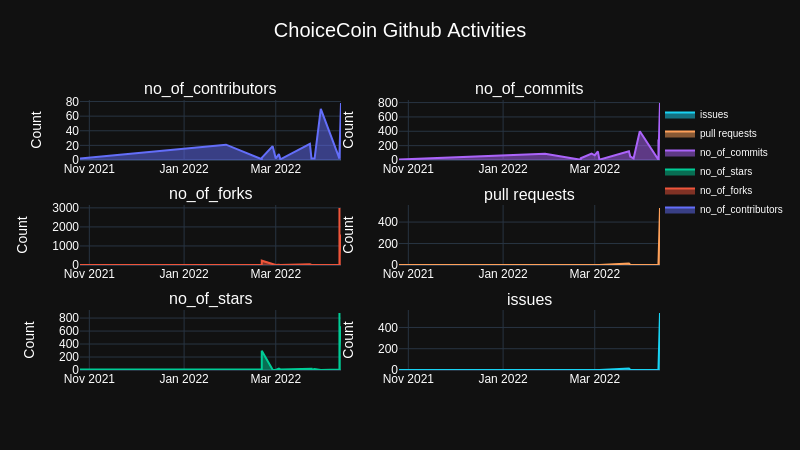

In [13]:
github_plot(choice_data).activities()

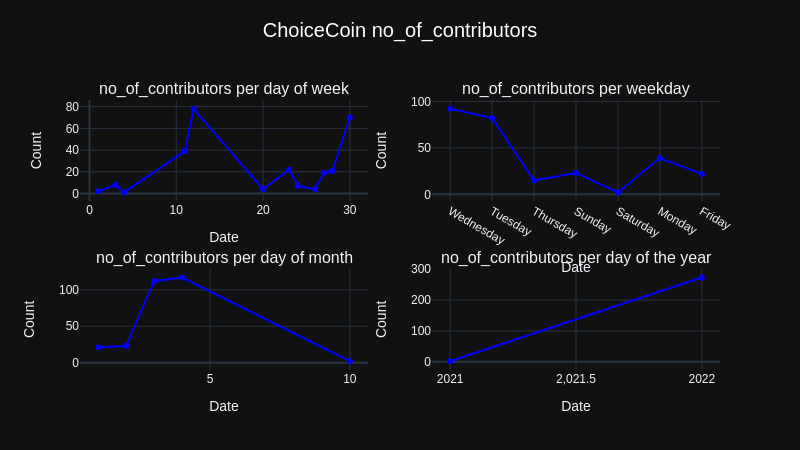

In [14]:
github_plot(choice_data).set_activity('no_of_contributors')

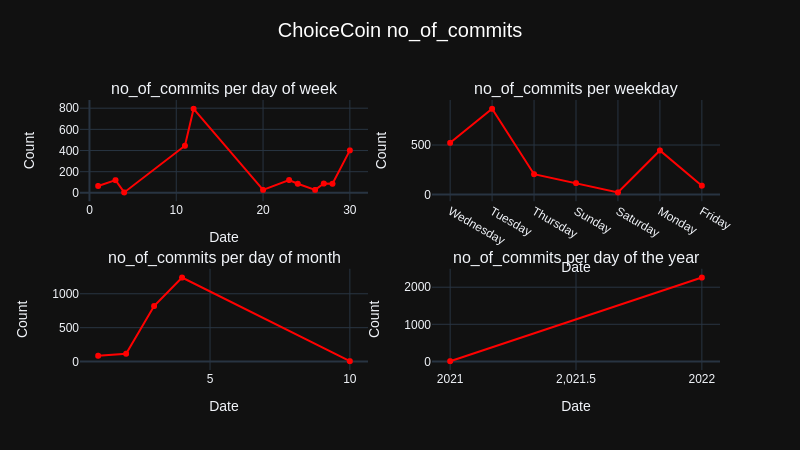

In [15]:
github_plot(choice_data).set_activity('no_of_commits')

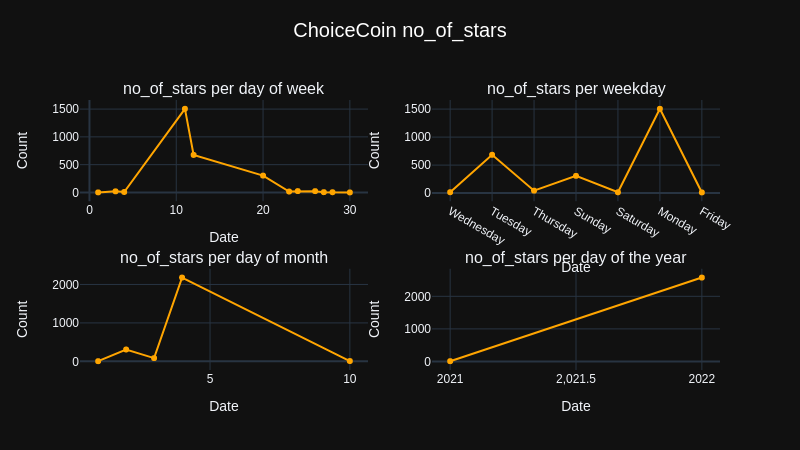

In [16]:
github_plot(choice_data).set_activity('no_of_stars')

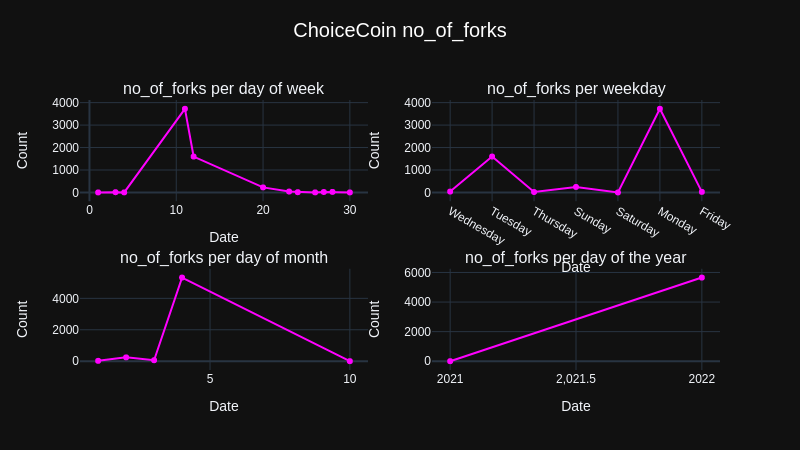

In [17]:
github_plot(choice_data).set_activity('no_of_forks')

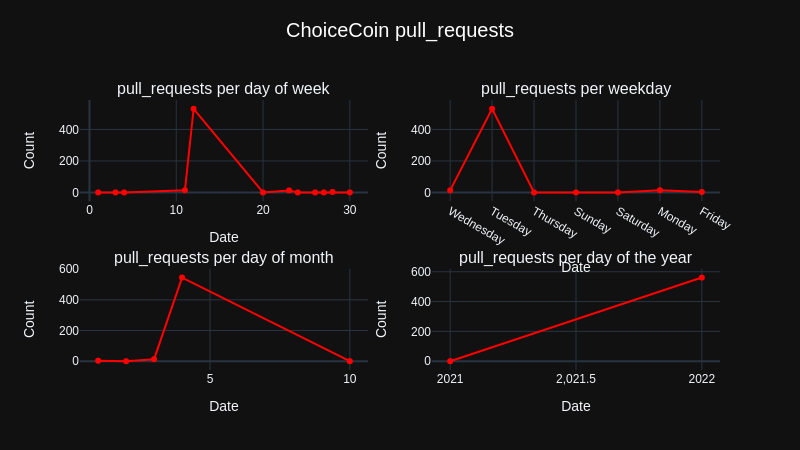

In [18]:
github_plot(choice_data).set_activity('pull_requests')

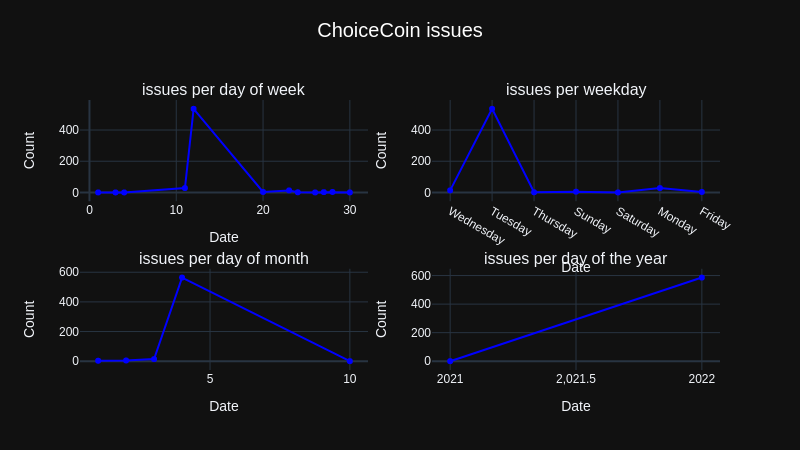

In [19]:
github_plot(choice_data).set_activity('issues')

# ALGOFI

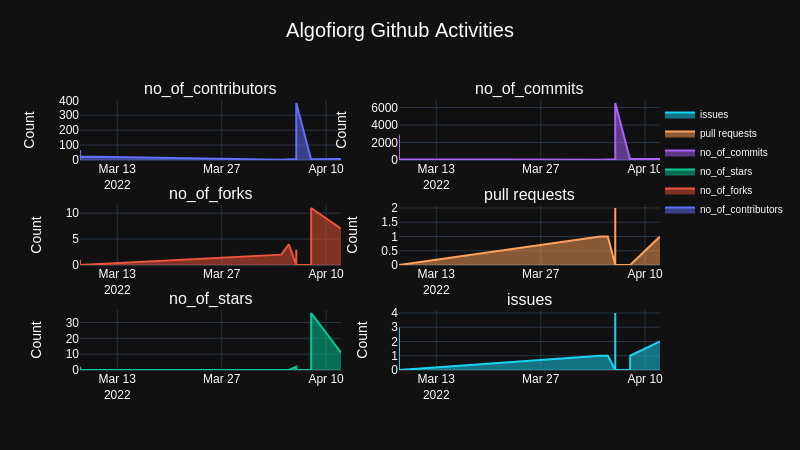

In [20]:
github_plot(algofi_data).activities()

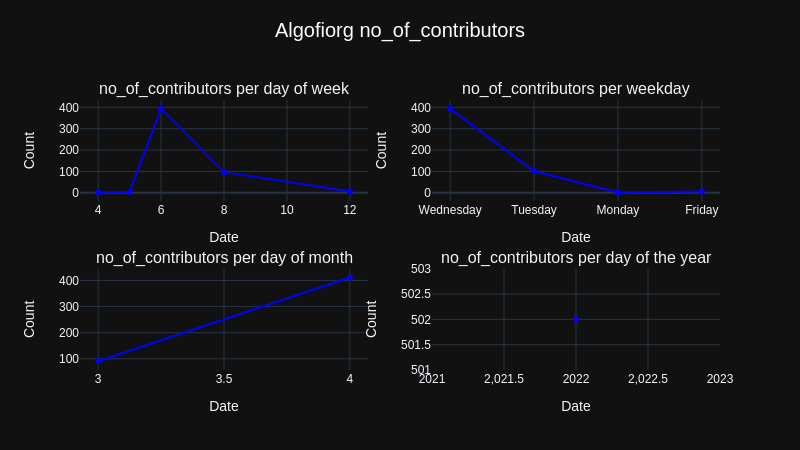

In [21]:
github_plot(algofi_data).set_activity('no_of_contributors')

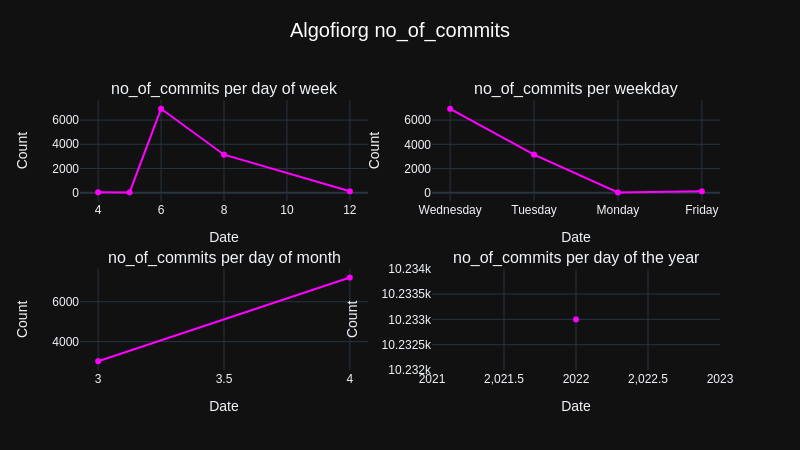

In [22]:
github_plot(algofi_data).set_activity('no_of_commits')

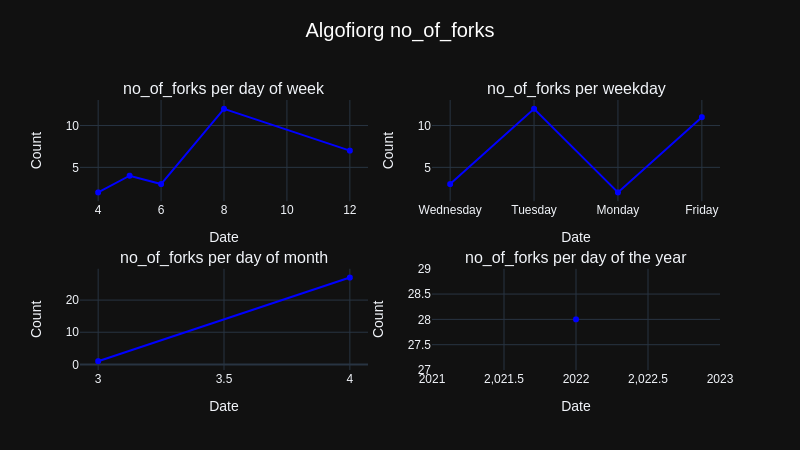

In [23]:
github_plot(algofi_data).set_activity('no_of_forks')

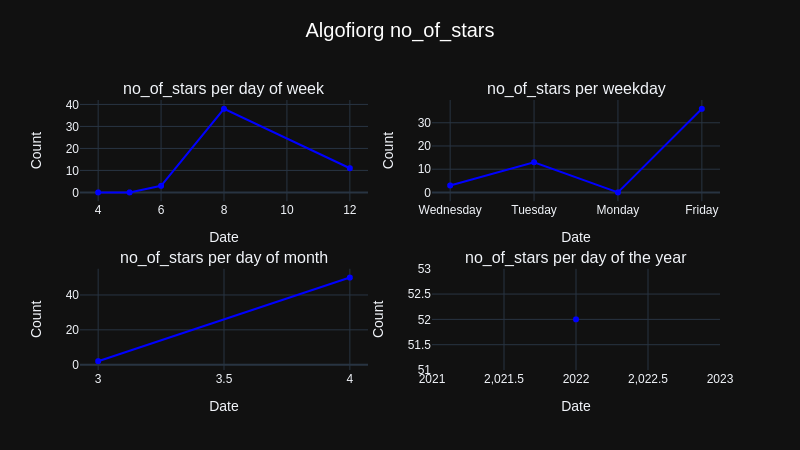

In [24]:
github_plot(algofi_data).set_activity('no_of_stars')

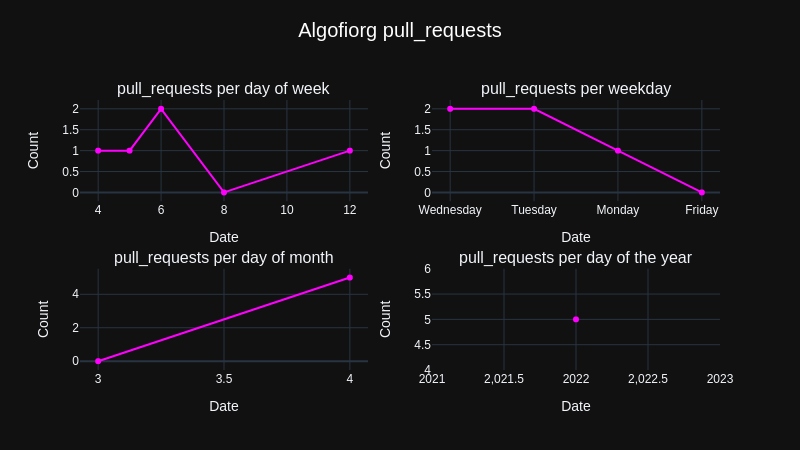

In [25]:
github_plot(algofi_data).set_activity('pull_requests')

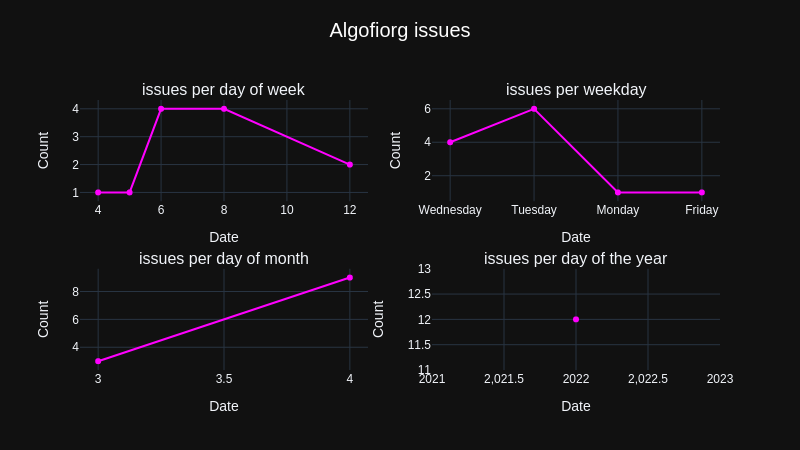

In [26]:
github_plot(algofi_data).set_activity('issues')

# SHOSHADEV

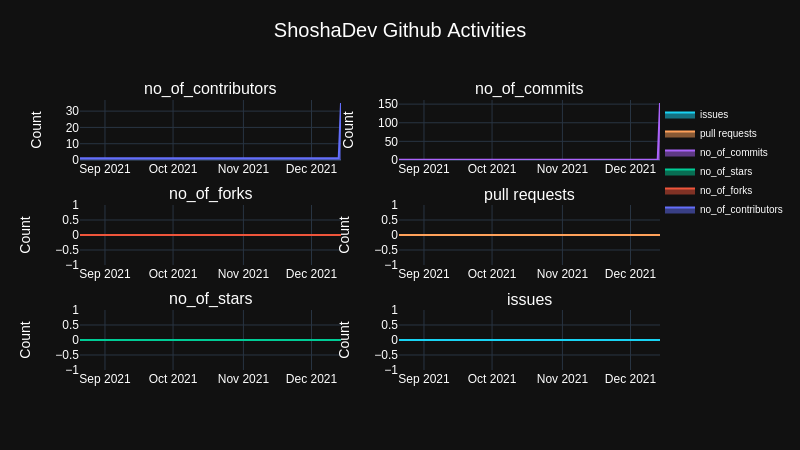

In [27]:
github_plot(shosha_data).activities()

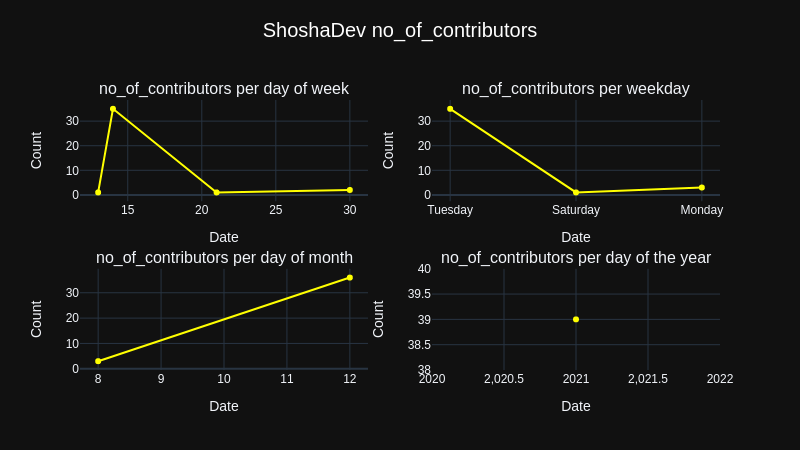

In [28]:
github_plot(shosha_data).set_activity('no_of_contributors')

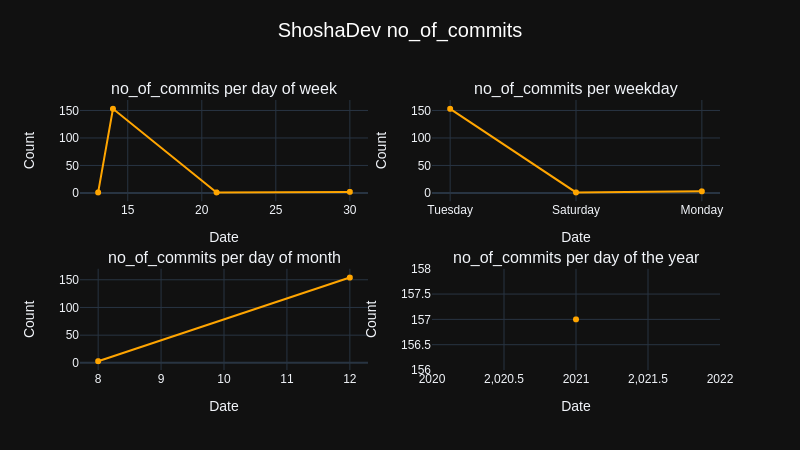

In [29]:
github_plot(shosha_data).set_activity('no_of_commits')